In [2]:
using Plots
using Pkg
# Pkg.add("Turing")
# Pkg.add("MCMCChains")
# Pkg.add("AdvancedHMC")
using Random
using Turing
using MCMCChains
using AdvancedHMC
using StatsPlots
using Pigeons
using Distributions
using Profile

In [4]:
pdf(truncated(Normal(0, 1), 0, 1), -5)

0.0

In [2]:
Threads.nthreads()

26

In [ ]:
@model function my_turing_model(n_trials, n_successes)
    p1 ~ Uniform(0, 1)
    p2 ~ Uniform(0, 1)
    n_successes ~ Binomial(n_trials, p1*p2)
    return n_successes
end
n_chains = 2
# n_rounds = 6
seed = Random.seed!(1234)
my_turing_target = TuringLogPotential(my_turing_model(100, 70))
# inputs = Inputs(target = my_turing_target, 
#             # n_chains = 20, 
#             n_rounds = n_rounds,
#             # seed = seed,
#             multithreaded = true,
#             record = [traces, round_trip])
inputs = Inputs(target =  Pigeons.toy_turing_unid_target(1000, 500),
            # n_chains = 2,
            n_rounds = 11,
            # variational = GaussianReference(first_tuning_round = 2),
            # multithreaded = true,
            record = [traces])
@profile pt = pigeons(inputs)
# println(size(pt))
# samples = Chains(pt)
# println(size(samples))
# StatsPlots.plot(samples, title = "Pigeons MCMC")
Profile.clear()
@profile pt = pigeons(inputs)


┌ Warning: More than one threads are available, but explore!() loop is not parallelized as inputs.multithreaded == false
└ @ Pigeons /home/nick/.julia/packages/Pigeons/AU55F/src/pt/checks.jl:12


────────────────────────────────────────────────────────────────────────────
  scans        Λ      log(Z₁/Z₀)   min(α)     mean(α)    min(αₑ)   mean(αₑ) 
────────── ────────── ────────── ────────── ────────── ────────── ──────────
        2       2.08      -37.9   8.24e-28      0.769          1          1 
        4       2.47      -10.1    0.00232      0.725          1          1 
        8       1.59      -6.11      0.541      0.823          1          1 
       16       2.27      -7.16      0.306      0.748          1          1 
       32       2.22      -6.95      0.619      0.754          1          1 
       64       2.27      -7.28      0.573      0.748          1          1 
      128       2.15      -7.41      0.674      0.761          1          1 
      256        2.4      -7.39      0.649      0.733          1          1 
      512       2.35       -7.3      0.711      0.739          1          1 
 1.02e+03        2.2      -7.24      0.741      0.755          1          1 

┌ Warning: More than one threads are available, but explore!() loop is not parallelized as inputs.multithreaded == false
└ @ Pigeons /home/nick/.julia/packages/Pigeons/AU55F/src/pt/checks.jl:12


      256        2.4      -7.39      0.649      0.733          1          1 
      512       2.35       -7.3      0.711      0.739          1          1 
 1.02e+03        2.2      -7.24      0.741      0.755          1          1 
 2.05e+03       2.23      -7.36      0.725      0.752          1          1 
────────────────────────────────────────────────────────────────────────────


PT(checkpoint = false, ...)

In [4]:
# using Pkg
# Pkg.add("ProfileView")
using Profile, ProfileView
Profile.clear()
@profile pt = pigeons(inputs)



(julia:25084): Gtk-WARNING **: 06:25:10.643: Unknown key gtk-modules in /home/nick/.config/gtk-4.0/settings.ini
┌ Warning: More than one threads are available, but explore!() loop is not parallelized as inputs.multithreaded == false
└ @ Pigeons /home/nick/.julia/packages/Pigeons/AU55F/src/pt/checks.jl:12


────────────────────────────────────────────────────────────────────────────
  scans        Λ      log(Z₁/Z₀)   min(α)     mean(α)    min(αₑ)   mean(αₑ) 
────────── ────────── ────────── ────────── ────────── ────────── ──────────
        2       2.08      -37.9   8.24e-28      0.769          1          1 
        4       2.47      -10.1    0.00232      0.725          1          1 
        8       1.59      -6.11      0.541      0.823          1          1 
       16       2.27      -7.16      0.306      0.748          1          1 
       32       2.22      -6.95      0.619      0.754          1          1 
       64       2.27      -7.28      0.573      0.748          1          1 
      128       2.15      -7.41      0.674      0.761          1          1 
      256        2.4      -7.39      0.649      0.733          1          1 
      512       2.35       -7.3      0.711      0.739          1          1 
 1.02e+03        2.2      -7.24      0.741      0.755          1          1 

PT(checkpoint = false, ...)

In [5]:
ProfileView.view()


(julia:25084): Gtk-WARNING **: 06:25:19.024: No IM module matching GTK_IM_MODULE=ibus found


Gtk4.GtkWindowLeaf(accessible-role=GTK_ACCESSIBLE_ROLE_APPLICATION, name="", parent, root, width-request=-1, height-request=-1, visible=true, sensitive=true, can-focus=true, has-focus=false, can-target=true, focus-on-click=true, focusable=false, has-default=false, receives-default=false, cursor, has-tooltip=false, tooltip-markup=nothing, tooltip-text=nothing, opacity=1.000000, overflow=GTK_OVERFLOW_HIDDEN, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, hexpand=false, vexpand=false, hexpand-set=false, vexpand-set=false, scale-factor=1, css-name="window", css-classes, layout-manager, title="Profile", resizable=true, modal=false, default-width=800, default-height=600, destroy-with-parent=false, hide-on-close=false, icon-name=nothing, display, decorated=true, deletable=true, transient-for, application, default-widget, focus-widget, child, titlebar, handle-menubar-accel=true, is-active=false, suspended=false, startup-id, mnemonics-

In [7]:
samples

Chains MCMC chain (2048×3×1 Array{Float64, 3}):

Iterations        = 1:1:2048
Number of chains  = 1
Samples per chain = 2048
parameters        = p1, p2
internals         = log_density

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          p1    0.6567    0.1112    0.0517     5.2569    36.1293    1.9495     ⋯
          p2    0.7834    0.1308    0.0610     5.2542    35.0984    1.9491     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          p1    0.5105    0.5465    0.6596    0.7676    0.8494
          p2    0.5887    0.6516    0.7588    0.9149    0.9792


Sampling   0%|                                          |  ETA: N/A
┌ Info: Found initial step size
│   ϵ = 0.00625
└ @ Turing.Inference /home/nicolas/.julia/packages/Turing/IXycm/src/mcmc/hmc.jl:207
Sampling   0%|▎                                         |  ETA: 0:05:47
Sampling   1%|▍                                         |  ETA: 0:02:57
Sampling   2%|▋                                         |  ETA: 0:01:59
Sampling   2%|▉                                         |  ETA: 0:01:29
Sampling   2%|█                                         |  ETA: 0:01:11
Sampling   3%|█▎                                        |  ETA: 0:00:59
Sampling   4%|█▌                                        |  ETA: 0:00:51
Sampling   4%|█▋                                        |  ETA: 0:00:45
Sampling   4%|█▉                                        |  ETA: 0:00:40
Sampling   5%|██▏                                       |  ETA: 0:00:36
Sampling   6%|██▎                                       |  ETA: 0:00:33
Sampling

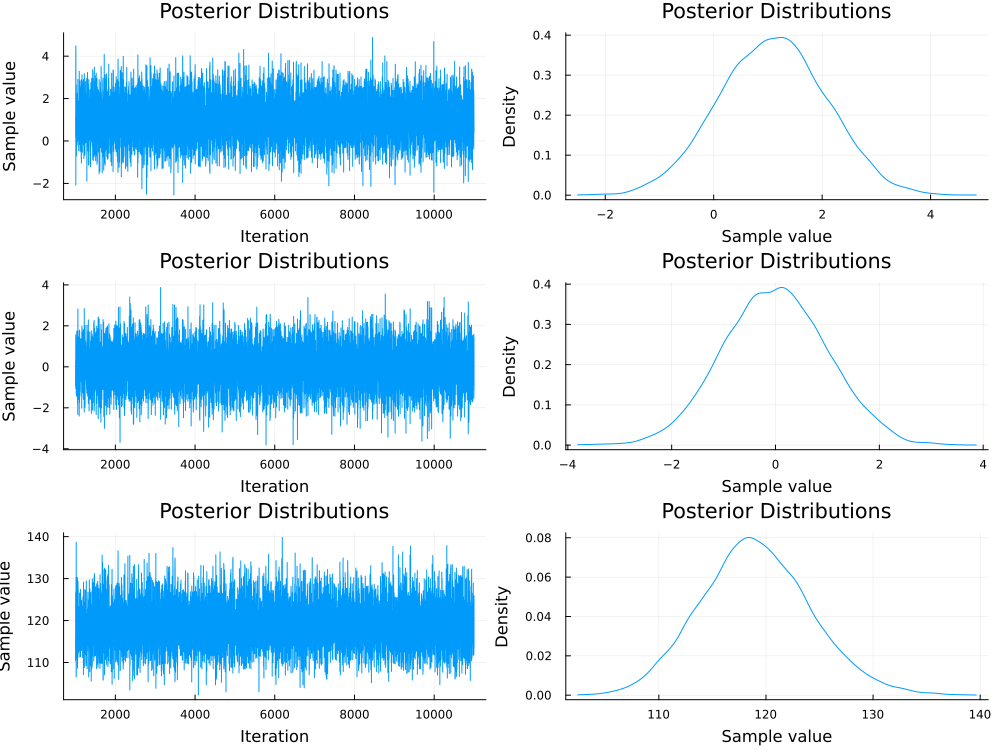

In [11]:
Random.seed!(123)  # For reproducibility
@model function bayesian_linear_regression(x, y)
    # Priors
    a ~ Normal(0, 1)
    b ~ Normal(0, 1)
    σ ~ Exponential(1)

    # Likelihood
    for i in 1:length(x)
        y[i] ~ Normal(a + b * x[i], σ)
    end
end
# Generate synthetic data
n = 100
x = collect(1:n) .+ randn(n) * 0.5
y = 2 .+ 3 .* x .+ randn(n) * 0.5
# Fit the model
model = bayesian_linear_regression(zeros(n), y)
sampler = Turing.NUTS()
chain = sample(model, sampler, 10000)
# Plot the results
plot(chain, title="Posterior Distributions", xlabel="Parameter Value", ylabel="Density")


In [10]:
size(chain)

(10000, 15, 1)

In [7]:
summaries, quantiles = describe(chain)

2-element Vector{ChainDataFrame}:
 Summary Statistics (3 x 8)
 Quantiles (3 x 6)

In [8]:
summaries

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

           a    1.8527    0.1024    0.0046   506.0679   415.0046    1.0004     ⋯
           b    3.0024    0.0018    0.0001   507.0980   475.9405    0.9995     ⋯
           σ    0.5269    0.0359    0.0018   422.7451   364.9668    1.0039     ⋯
                                                                1 column omitted
